22521062 - Tran Thi Kieu Oanh

# TH4

## Bai tap 1

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("MySparkApp") \
    .getOrCreate()

25/04/17 08:38:28 WARN Utils: Your hostname, oanh-VirtualBox resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
25/04/17 08:38:28 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/04/17 08:38:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [6]:
df = spark.read.json("file:////home/oanh/Downloads/spark-3.5.5-bin-hadoop3/examples/src/main/resources/people.json")

In [7]:
df.show()

+----+-------+
| age|   name|
+----+-------+
|NULL|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



In [8]:
df.printSchema()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



In [9]:
df.select("name").show()

+-------+
|   name|
+-------+
|Michael|
|   Andy|
| Justin|
+-------+



In [10]:
df.select(df['name'],df['age']+1).show()

+-------+---------+
|   name|(age + 1)|
+-------+---------+
|Michael|     NULL|
|   Andy|       31|
| Justin|       20|
+-------+---------+



In [11]:
df.filter(df['age']>21).show()

+---+----+
|age|name|
+---+----+
| 30|Andy|
+---+----+



In [12]:
df.groupBy("age").count().show()

[Stage 5:===========================================================(1 + 0) / 1]

+----+-----+
| age|count|
+----+-----+
|  19|    1|
|NULL|    1|
|  30|    1|
+----+-----+



## Bai tap 2

In [14]:
spark = SparkSession.builder.appName("ReadCSV").getOrCreate()

25/04/17 08:50:02 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [19]:
df = spark.read.format("csv").option("header","true").load("file:////home/oanh/Lab4/Đính kèm-20250417T011426Z-001/Đính kèm/ebay.csv")

In [20]:
df.show()

+----------+-----+--------+--------------+----------+-------+-----+----+----------+
| auctionid|  bid| bidtime|        bidder|bidderrate|openbid|price|item|daystolive|
+----------+-----+--------+--------------+----------+-------+-----+----+----------+
|8213034705|   95|2.927373|      jake7870|         0|     95|117.5|xbox|         3|
|8213034705|  115|2.943484| davidbresler2|         1|     95|117.5|xbox|         3|
|8213034705|  100|2.951285|gladimacowgirl|        58|     95|117.5|xbox|         3|
|8213034705|117.5|2.998947|       daysrus|        10|     95|117.5|xbox|         3|
|8213060420|    2|0.065266|    donnie4814|         5|      1|  120|xbox|         3|
|8213060420|15.25|0.123218|   myreeceyboy|        52|      1|  120|xbox|         3|
|8213060420|    3|0.186539|  parakeet2004|         5|      1|  120|xbox|         3|
|8213060420|   10| 0.18669|  parakeet2004|         5|      1|  120|xbox|         3|
|8213060420|24.99|0.187049|  parakeet2004|         5|      1|  120|xbox|    

In [21]:
df.printSchema()

root
 |-- auctionid: string (nullable = true)
 |-- bid: string (nullable = true)
 |-- bidtime: string (nullable = true)
 |-- bidder: string (nullable = true)
 |-- bidderrate: string (nullable = true)
 |-- openbid: string (nullable = true)
 |-- price: string (nullable = true)
 |-- item: string (nullable = true)
 |-- daystolive: string (nullable = true)



In [22]:
df.select("auctionid").distinct().count()

627

In [23]:
df.groupBy("auctionid","item").count().show()

+----------+-------+-----+
| auctionid|   item|count|
+----------+-------+-----+
|1645883276|cartier|   12|
|1641242797|cartier|    5|
|1642005995|cartier|   18|
|3020060476|   palm|   22|
|1644681469|cartier|   14|
|8212145833|   xbox|   26|
|1638844464|cartier|   16|
|3020573049|   palm|    2|
|3015632013|   palm|   28|
|3024659380|   palm|   26|
|3025373736|   palm|   15|
|8213387659|   xbox|   25|
|1643201832|cartier|    4|
|3014834745|   palm|   21|
|3020257463|   palm|   16|
|3020274575|   palm|   11|
|3019821569|   palm|   27|
|3024707992|   palm|   20|
|8212277835|   xbox|    3|
|3019326870|   palm|   33|
+----------+-------+-----+
only showing top 20 rows



In [24]:
highprice = df.filter("price > 100")
highprice.show()

+----------+-----+--------+--------------+----------+-------+-----+----+----------+
| auctionid|  bid| bidtime|        bidder|bidderrate|openbid|price|item|daystolive|
+----------+-----+--------+--------------+----------+-------+-----+----+----------+
|8213034705|   95|2.927373|      jake7870|         0|     95|117.5|xbox|         3|
|8213034705|  115|2.943484| davidbresler2|         1|     95|117.5|xbox|         3|
|8213034705|  100|2.951285|gladimacowgirl|        58|     95|117.5|xbox|         3|
|8213034705|117.5|2.998947|       daysrus|        10|     95|117.5|xbox|         3|
|8213060420|    2|0.065266|    donnie4814|         5|      1|  120|xbox|         3|
|8213060420|15.25|0.123218|   myreeceyboy|        52|      1|  120|xbox|         3|
|8213060420|    3|0.186539|  parakeet2004|         5|      1|  120|xbox|         3|
|8213060420|   10| 0.18669|  parakeet2004|         5|      1|  120|xbox|         3|
|8213060420|24.99|0.187049|  parakeet2004|         5|      1|  120|xbox|    

## Bai tap 3

In [28]:
df = spark.read.json("file:////home/oanh/Downloads/spark-3.5.5-bin-hadoop3/examples/src/main/resources/people.json")

In [29]:
df.createOrReplaceTempView("people")

In [30]:
sqlDF = spark.sql("select * from people")
sqlDF.show()

+----+-------+
| age|   name|
+----+-------+
|NULL|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



In [31]:
# d. chon duy nhat 1 cot de hien thi
sqlDFd = spark.sql("select name from people")
sqlDFd.show()

+-------+
|   name|
+-------+
|Michael|
|   Andy|
| Justin|
+-------+



In [32]:
# e. hien thi toan bo cac cot gia tri cua cot age tang them 1
sqlDFe = spark.sql("select name, age + 1 from people")
sqlDFe.show()

+-------+---------+
|   name|(age + 1)|
+-------+---------+
|Michael|     NULL|
|   Andy|       31|
| Justin|       20|
+-------+---------+



In [33]:
# f. loc ra nhung nguoi co tuoi lon hon 21
sqlDFf = spark.sql("select * from people where age > 21")
sqlDFf.show()

+---+----+
|age|name|
+---+----+
| 30|Andy|
+---+----+



In [34]:
# g. dem so nguoi theo tung do tuoi
sqlDFg = spark.sql("select age, count(*) from people group by age")
sqlDFg.show()

+----+--------+
| age|count(1)|
+----+--------+
|  19|       1|
|NULL|       1|
|  30|       1|
+----+--------+



## Bai tap 4

In [35]:
df = spark.read.format("csv").option("header","true").load("file:////home/oanh/Lab4/Đính kèm-20250417T011426Z-001/Đính kèm/ebay.csv")

In [36]:
# a. tao khung nhin tam tu dataframe df
df.createOrReplaceTempView("ebay")

In [37]:
sqlDF = spark.sql("select * from ebay")
sqlDF.show()

+----------+-----+--------+--------------+----------+-------+-----+----+----------+
| auctionid|  bid| bidtime|        bidder|bidderrate|openbid|price|item|daystolive|
+----------+-----+--------+--------------+----------+-------+-----+----+----------+
|8213034705|   95|2.927373|      jake7870|         0|     95|117.5|xbox|         3|
|8213034705|  115|2.943484| davidbresler2|         1|     95|117.5|xbox|         3|
|8213034705|  100|2.951285|gladimacowgirl|        58|     95|117.5|xbox|         3|
|8213034705|117.5|2.998947|       daysrus|        10|     95|117.5|xbox|         3|
|8213060420|    2|0.065266|    donnie4814|         5|      1|  120|xbox|         3|
|8213060420|15.25|0.123218|   myreeceyboy|        52|      1|  120|xbox|         3|
|8213060420|    3|0.186539|  parakeet2004|         5|      1|  120|xbox|         3|
|8213060420|   10| 0.18669|  parakeet2004|         5|      1|  120|xbox|         3|
|8213060420|24.99|0.187049|  parakeet2004|         5|      1|  120|xbox|    

In [40]:
# d. dem so cuoc dau gia da duoc to chuc bang cau lenh
sqlDFd = spark.sql("SELECT COUNT(DISTINCT auctionid) as total_auctions FROM ebay")
sqlDFd.show()

+--------------+
|total_auctions|
+--------------+
|           627|
+--------------+



In [46]:
# e. dem so luong gia dau tren moi mat hang
sqlDFe = spark.sql("select auctionid, item, COUNT(*) AS count from ebay group by auctionid, item")
sqlDFe.show()

[Stage 44:>                                                         (0 + 1) / 1]

+----------+-------+-----+
| auctionid|   item|count|
+----------+-------+-----+
|1645883276|cartier|   12|
|1641242797|cartier|    5|
|1642005995|cartier|   18|
|3020060476|   palm|   22|
|1644681469|cartier|   14|
|8212145833|   xbox|   26|
|1638844464|cartier|   16|
|3020573049|   palm|    2|
|3015632013|   palm|   28|
|3024659380|   palm|   26|
|3025373736|   palm|   15|
|8213387659|   xbox|   25|
|1643201832|cartier|    4|
|3014834745|   palm|   21|
|3020257463|   palm|   16|
|3020274575|   palm|   11|
|3019821569|   palm|   27|
|3024707992|   palm|   20|
|8212277835|   xbox|    3|
|3019326870|   palm|   33|
+----------+-------+-----+
only showing top 20 rows



In [48]:
# f. loc va hien thi tat ca nhung phien dau gia co gia tri dong cua lon hon 100
sqlDFe = spark.sql("select * from ebay where price > 100")
sqlDFe.show()

+----------+-----+--------+--------------+----------+-------+-----+----+----------+
| auctionid|  bid| bidtime|        bidder|bidderrate|openbid|price|item|daystolive|
+----------+-----+--------+--------------+----------+-------+-----+----+----------+
|8213034705|   95|2.927373|      jake7870|         0|     95|117.5|xbox|         3|
|8213034705|  115|2.943484| davidbresler2|         1|     95|117.5|xbox|         3|
|8213034705|  100|2.951285|gladimacowgirl|        58|     95|117.5|xbox|         3|
|8213034705|117.5|2.998947|       daysrus|        10|     95|117.5|xbox|         3|
|8213060420|    2|0.065266|    donnie4814|         5|      1|  120|xbox|         3|
|8213060420|15.25|0.123218|   myreeceyboy|        52|      1|  120|xbox|         3|
|8213060420|    3|0.186539|  parakeet2004|         5|      1|  120|xbox|         3|
|8213060420|   10| 0.18669|  parakeet2004|         5|      1|  120|xbox|         3|
|8213060420|24.99|0.187049|  parakeet2004|         5|      1|  120|xbox|    

# TH5

## Bai tap 1

In [12]:
# Doc du lieu dau vao
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("GeoDataAnalysis") \
    .getOrCreate()

spark.sparkContext.setLogLevel("ERROR")  # Giảm log cảnh báo

In [13]:
data = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load("file:////home/oanh/Lab4/Đính kèm-20250417T011426Z-001/Đính kèm/data_geo.csv")  

data.cache()
data.count()

294

In [14]:
data.printSchema()
data.show(5)

root
 |-- 2014 rank: integer (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- State Code: string (nullable = true)
 |-- 2014 Population estimate: integer (nullable = true)
 |-- 2015 median sales price: double (nullable = true)

+---------+-------------+-------+----------+------------------------+-----------------------+
|2014 rank|         City|  State|State Code|2014 Population estimate|2015 median sales price|
+---------+-------------+-------+----------+------------------------+-----------------------+
|      101|   Birmingham|Alabama|        AL|                  212247|                  162.9|
|      125|   Huntsville|Alabama|        AL|                  188226|                  157.7|
|      122|       Mobile|Alabama|        AL|                  194675|                  122.5|
|      114|   Montgomery|Alabama|        AL|                  200481|                  129.0|
|       64|Anchorage[19]| Alaska|        AK|                  30101

In [15]:
# Loai bo gia tri trong
data = data.dropna()
data.count()

109

In [16]:
# Tao view de truy van
data.createOrReplaceTempView("data_geo")

df1 = spark.sql("""
SELECT City, `State Code`, `2014 Population estimate` / 1000 AS `2014 Pop estimate`,
       `2015 median sales price`
FROM data_geo
""")

df1.show(5)

+----------+----------+-----------------+-----------------------+
|      City|State Code|2014 Pop estimate|2015 median sales price|
+----------+----------+-----------------+-----------------------+
|Birmingham|        AL|          212.247|                  162.9|
|Huntsville|        AL|          188.226|                  157.7|
|    Mobile|        AL|          194.675|                  122.5|
|Montgomery|        AL|          200.481|                  129.0|
|   Phoenix|        AZ|         1537.058|                  206.1|
+----------+----------+-----------------+-----------------------+
only showing top 5 rows



In [17]:
# Tien xu ly du lieu
from pyspark.mllib.regression import LabeledPoint

rdd = data.select("2014 Population estimate", "2015 median sales price") \
    .rdd.map(lambda r: LabeledPoint(r[1], [r[0]]))

df_mllib = rdd.toDF()
df_mllib.show(5)

+-----------+-----+
|   features|label|
+-----------+-----+
| [212247.0]|162.9|
| [188226.0]|157.7|
| [194675.0]|122.5|
| [200481.0]|129.0|
|[1537058.0]|206.1|
+-----------+-----+
only showing top 5 rows



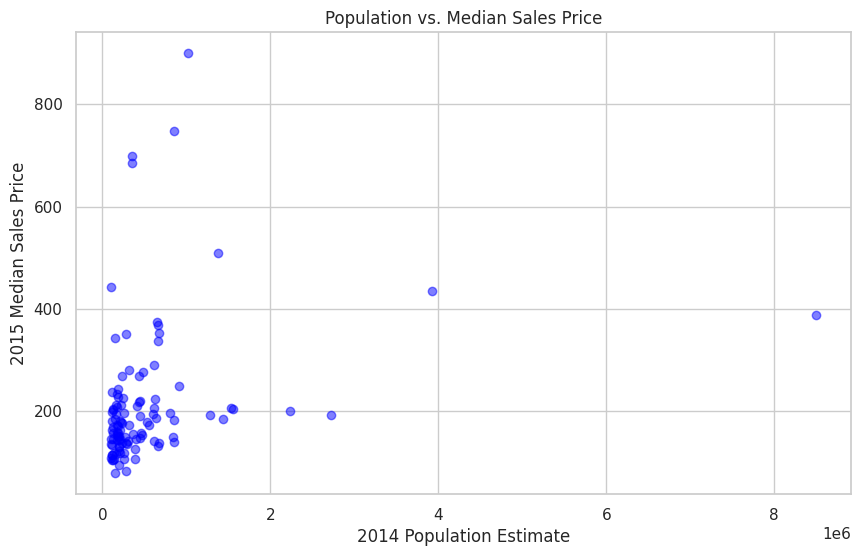

In [20]:
# Truc quan hoa du lieu
import matplotlib.pyplot as plt
from pandas import DataFrame

x = df_mllib.rdd.map(lambda p: p.features[0]).collect()
y = df_mllib.rdd.map(lambda p: p.label).collect()

pydf = DataFrame({'Population': x, 'Price': y})

plt.figure(figsize=(10, 6))
plt.scatter(pydf['Population'], pydf['Price'], color='blue', alpha=0.5)
plt.title('Population vs. Median Sales Price')
plt.xlabel('2014 Population Estimate')
plt.ylabel('2015 Median Sales Price')
plt.grid(True)
plt.show()


## Bai tap 2

In [21]:
from pyspark.ml.regression import LinearRegression

In [24]:
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import col
from pyspark.sql import Row

# Chuyển đổi dữ liệu từ df_mllib (đã tạo ở bài 1) sang định dạng cần thiết
df_ml = df_mllib.rdd.map(lambda lp: Row(label=lp.label, features=Vectors.dense(lp.features))) \
    .toDF()

df_ml.show(5)

+-----+-----------+
|label|   features|
+-----+-----------+
|162.9| [212247.0]|
|157.7| [188226.0]|
|122.5| [194675.0]|
|129.0| [200481.0]|
|206.1|[1537058.0]|
+-----+-----------+
only showing top 5 rows



In [25]:
lr = LinearRegression()

In [26]:
modelA = lr.fit(df_ml,{lr.regParam:0.0})
modelB = lr.fit(df_ml,{lr.regParam:100.0})

In [27]:
print(">>>> ModelA intercept: {}, coefficient: {}".format(modelA.intercept, modelA.coefficients[0]))
print(">>>> ModelB intercept: {}, coefficient: {}".format(modelB.intercept, modelB.coefficients[0]))

>>>> ModelA intercept: 191.29427575139394, coefficient: 3.779789682338248e-05
>>>> ModelB intercept: 199.85112564667153, coefficient: 2.1603499483717156e-05


In [28]:
predictionsA = modelA.transform(df_ml)
predictionsA.show(5)

predictionsB = modelB.transform(df_ml)
predictionsB.show(5)

+-----+-----------+------------------+
|label|   features|        prediction|
+-----+-----------+------------------+
|162.9| [212247.0]| 199.3167659584664|
|157.7| [188226.0]|198.40882267887193|
|122.5| [194675.0]|198.65258131548592|
|129.0| [200481.0]|198.87203590444247|
|206.1|[1537058.0]|249.39183544694856|
+-----+-----------+------------------+
only showing top 5 rows



[Stage 36:>                                                         (0 + 1) / 1]

+-----+-----------+------------------+
|label|   features|        prediction|
+-----+-----------+------------------+
|162.9| [212247.0]|204.43640360159205|
|157.7| [188226.0]|203.91746594049368|
|122.5| [194675.0]|204.05678690866418|
|129.0| [200481.0]|204.18221682666663|
|206.1|[1537058.0]|233.05695735611485|
+-----+-----------+------------------+
only showing top 5 rows



## Bai tap 3

In [29]:
from pyspark.ml.evaluation import RegressionEvaluator

# Dùng chỉ số RMSE để đánh giá
evaluator = RegressionEvaluator(metricName="rmse")

RMSEA = evaluator.evaluate(predictionsA)
print("ModelA: Root Mean Squared Error = {:.3f}".format(RMSEA))

RMSEB = evaluator.evaluate(predictionsB)
print("ModelB: Root Mean Squared Error = {:.3f}".format(RMSEB))

ModelA: Root Mean Squared Error = 128.602
ModelB: Root Mean Squared Error = 129.496


## Bai tap 4

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [33]:
pop = df_mllib.rdd.map(lambda p: p.features[0]).collect()
price = df_mllib.rdd.map(lambda p: p.label).collect()
predA = predictionsA.select("prediction").rdd.map(lambda r: r[0]).collect()
predB = predictionsB.select("prediction").rdd.map(lambda r: r[0]).collect()

pydf = pd.DataFrame({
    'pop': pop,
    'price': price,
    'predA': predA,
    'predB': predB
})

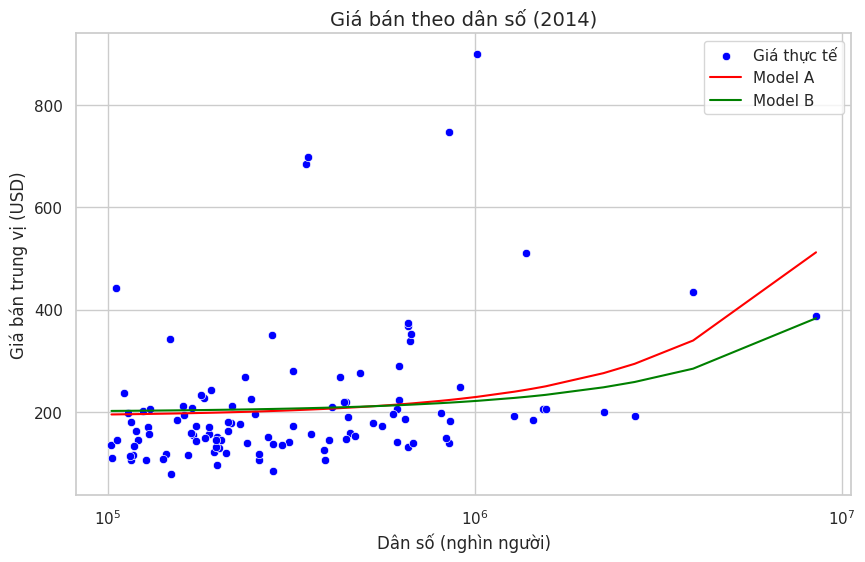

In [34]:
# Truc quan ket qua
plt.figure(figsize=(10, 6))

sns.scatterplot(x='pop', y='price', data=pydf, color='blue', label='Giá thực tế')
sns.lineplot(x='pop', y='predA', data=pydf, color='red', label='Model A')
sns.lineplot(x='pop', y='predB', data=pydf, color='green', label='Model B')

plt.xscale('log')

plt.title('Giá bán theo dân số (2014)', fontsize=14)
plt.xlabel('Dân số (nghìn người)', fontsize=12)
plt.ylabel('Giá bán trung vị (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# TH6

## SparkMLlib_DecisionTree

In [35]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName("SparkMLLib_DecisionTree").getOrCreate()

In [37]:
from __future__ import print_function

from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load the data stored in LIBSVM format as a DataFrame.
data = spark.read.format("libsvm").load("file:////home/oanh/Downloads/spark-3.5.5-bin-hadoop3/data/mllib/sample_libsvm_data.txt")

data.show()

data.count()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(692,[127,128,129...|
|  1.0|(692,[158,159,160...|
|  1.0|(692,[124,125,126...|
|  1.0|(692,[152,153,154...|
|  1.0|(692,[151,152,153...|
|  0.0|(692,[129,130,131...|
|  1.0|(692,[158,159,160...|
|  1.0|(692,[99,100,101,...|
|  0.0|(692,[154,155,156...|
|  0.0|(692,[127,128,129...|
|  1.0|(692,[154,155,156...|
|  0.0|(692,[153,154,155...|
|  0.0|(692,[151,152,153...|
|  1.0|(692,[129,130,131...|
|  0.0|(692,[154,155,156...|
|  1.0|(692,[150,151,152...|
|  0.0|(692,[124,125,126...|
|  0.0|(692,[152,153,154...|
|  1.0|(692,[97,98,99,12...|
|  1.0|(692,[124,125,126...|
+-----+--------------------+
only showing top 20 rows



100

In [38]:
# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(data)

# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data)

In [39]:
data.show()

data.count()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(692,[127,128,129...|
|  1.0|(692,[158,159,160...|
|  1.0|(692,[124,125,126...|
|  1.0|(692,[152,153,154...|
|  1.0|(692,[151,152,153...|
|  0.0|(692,[129,130,131...|
|  1.0|(692,[158,159,160...|
|  1.0|(692,[99,100,101,...|
|  0.0|(692,[154,155,156...|
|  0.0|(692,[127,128,129...|
|  1.0|(692,[154,155,156...|
|  0.0|(692,[153,154,155...|
|  0.0|(692,[151,152,153...|
|  1.0|(692,[129,130,131...|
|  0.0|(692,[154,155,156...|
|  1.0|(692,[150,151,152...|
|  0.0|(692,[124,125,126...|
|  0.0|(692,[152,153,154...|
|  1.0|(692,[97,98,99,12...|
|  1.0|(692,[124,125,126...|
+-----+--------------------+
only showing top 20 rows



100

In [40]:
# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

# Train a DecisionTree model.
dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

In [41]:
# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "indexedLabel", "features").show()

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))

+----------+------------+--------------------+
|prediction|indexedLabel|            features|
+----------+------------+--------------------+
|       1.0|         1.0|(692,[98,99,100,1...|
|       1.0|         1.0|(692,[123,124,125...|
|       1.0|         1.0|(692,[124,125,126...|
|       1.0|         1.0|(692,[126,127,128...|
|       1.0|         1.0|(692,[126,127,128...|
|       1.0|         1.0|(692,[126,127,128...|
|       1.0|         1.0|(692,[126,127,128...|
|       1.0|         1.0|(692,[128,129,130...|
|       1.0|         1.0|(692,[152,153,154...|
|       1.0|         1.0|(692,[152,153,154...|
|       1.0|         1.0|(692,[153,154,155...|
|       1.0|         1.0|(692,[154,155,156...|
|       1.0|         1.0|(692,[234,235,237...|
|       1.0|         0.0|(692,[99,100,101,...|
|       0.0|         0.0|(692,[123,124,125...|
|       0.0|         0.0|(692,[123,124,125...|
|       0.0|         0.0|(692,[123,124,125...|
|       0.0|         0.0|(692,[124,125,126...|
|       0.0| 

[Stage 63:>                                                         (0 + 1) / 1]

Test Error = 0.0333333 


## SparkMLlib_KMeans

In [42]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").appName("SparkMLLib_KMeans").getOrCreate()

In [43]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Loads data.
dataset = spark.read.format("libsvm").load("file:////home/oanh/Downloads/spark-3.5.5-bin-hadoop3/data/mllib/sample_kmeans_data.txt")

dataset.show()

dataset.count()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|           (3,[],[])|
|  1.0|(3,[0,1,2],[0.1,0...|
|  2.0|(3,[0,1,2],[0.2,0...|
|  3.0|(3,[0,1,2],[9.0,9...|
|  4.0|(3,[0,1,2],[9.1,9...|
|  5.0|(3,[0,1,2],[9.2,9...|
+-----+--------------------+



6

In [44]:
# Trains a k-means model.
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(dataset)

In [45]:
# Make predictions
predictions = model.transform(dataset)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

[Stage 88:>                                                         (0 + 1) / 1]

Silhouette with squared euclidean distance = 0.9997530305375207


In [46]:
# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[9.1 9.1 9.1]
[0.1 0.1 0.1]


## SparkMLlib_NaiveBayes

In [47]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").appName("SparkMLLib_NaiveBayes").getOrCreate()

In [48]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load training data
data = spark.read.format("libsvm").load("file:////home/oanh/Downloads/spark-3.5.5-bin-hadoop3/data/mllib/sample_libsvm_data.txt")

data.show()
data.count()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(692,[127,128,129...|
|  1.0|(692,[158,159,160...|
|  1.0|(692,[124,125,126...|
|  1.0|(692,[152,153,154...|
|  1.0|(692,[151,152,153...|
|  0.0|(692,[129,130,131...|
|  1.0|(692,[158,159,160...|
|  1.0|(692,[99,100,101,...|
|  0.0|(692,[154,155,156...|
|  0.0|(692,[127,128,129...|
|  1.0|(692,[154,155,156...|
|  0.0|(692,[153,154,155...|
|  0.0|(692,[151,152,153...|
|  1.0|(692,[129,130,131...|
|  0.0|(692,[154,155,156...|
|  1.0|(692,[150,151,152...|
|  0.0|(692,[124,125,126...|
|  0.0|(692,[152,153,154...|
|  1.0|(692,[97,98,99,12...|
|  1.0|(692,[124,125,126...|
+-----+--------------------+
only showing top 20 rows



100

In [49]:
# Split the data into train and test
splits = data.randomSplit([0.6, 0.4], 1234)
train = splits[0]
test = splits[1]

# create the trainer and set its parameters
nb = NaiveBayes(smoothing=1.0, modelType="multinomial")

# train the model
model = nb.fit(train)

In [50]:
# select example rows to display.
predictions = model.transform(test)
predictions.show()

# compute accuracy on the test set
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test set accuracy = " + str(accuracy))

+-----+--------------------+--------------------+-----------+----------+
|label|            features|       rawPrediction|probability|prediction|
+-----+--------------------+--------------------+-----------+----------+
|  0.0|(692,[95,96,97,12...|[-172664.79564650...|  [1.0,0.0]|       0.0|
|  0.0|(692,[98,99,100,1...|[-176279.15054306...|  [1.0,0.0]|       0.0|
|  0.0|(692,[122,123,124...|[-189600.55409526...|  [1.0,0.0]|       0.0|
|  0.0|(692,[124,125,126...|[-274673.88337431...|  [1.0,0.0]|       0.0|
|  0.0|(692,[124,125,126...|[-183393.03869049...|  [1.0,0.0]|       0.0|
|  0.0|(692,[125,126,127...|[-256992.48807619...|  [1.0,0.0]|       0.0|
|  0.0|(692,[126,127,128...|[-210411.53649773...|  [1.0,0.0]|       0.0|
|  0.0|(692,[127,128,129...|[-170627.63616681...|  [1.0,0.0]|       0.0|
|  0.0|(692,[127,128,129...|[-212157.96750469...|  [1.0,0.0]|       0.0|
|  0.0|(692,[127,128,129...|[-183253.80108550...|  [1.0,0.0]|       0.0|
|  0.0|(692,[128,129,130...|[-246528.93739632...|  

## SparkMLlib_TFIDF

In [51]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").appName("SparkMLLib_TFIDF").getOrCreate()

In [52]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer

sentenceData = spark.createDataFrame([
    (0.0, "Hi I heard about Spark"),
    (0.0, "I wish Java could use case classes"),
    (1.0, "Logistic regression models are neat")
], ["label", "sentence"])

tokenizer = Tokenizer(inputCol="sentence", outputCol="words")
wordsData = tokenizer.transform(sentenceData)

hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures", numFeatures=20)
featurizedData = hashingTF.transform(wordsData)
# alternatively, CountVectorizer can also be used to get term frequency vectors

idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(featurizedData)
rescaledData = idfModel.transform(featurizedData)

rescaledData.select("label", "features").show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(20,[6,8,13,16],[...|
|  0.0|(20,[0,2,7,13,15,...|
|  1.0|(20,[3,4,6,11,19]...|
+-----+--------------------+

